In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def printClinicOutCome():
    #print clinic dx stat and save as ClinicOutCome_STAT.txt
    with open('ClinicOutCome_STAT.txt', 'w') as f:
        for i in range(16,40,2):
            f.write("*************************************" + df.columns[i] + "*************************************\n")
            f.write(str(df.iloc[:,i].value_counts()))
            f.write("\n")
            
def printCTdata_STAT():
    # print CT data stat and save as CTdata_STAT.txt
    with open('CTdata_STAT.txt', 'w') as f:
        for i in range(41,52):
            f.write("**************************" + df.columns[i] + "**************************\n")
            f.write(str(df.iloc[:,i].describe()))
            f.write("\n")

df = pd.read_excel("OppScrData.xlsx")
df.info()
printClinicOutCome()
printCTdata_STAT()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Record ID                                    9223 non-null   int64  
 1   Visit ID                                     9223 non-null   int64  
 2   PT ID                                        9223 non-null   int64  
 3   Clinical F/U interval  [d from CT]           9223 non-null   int64  
 4   BMI                                          9100 non-null   float64
 5   BMI >30                                      9100 non-null   object 
 6   Sex                                          9223 non-null   object 
 7   Age at CT                                    9223 non-null   int64  
 8   Tobacco                                      8615 non-null   object 
 9   Alcohol abuse                                257 non-null    object 
 10  

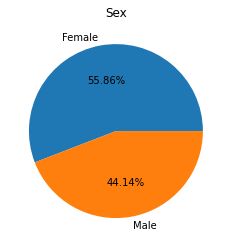

9223.0
['20 to 30' '30 to 40' '40 to 50' '50 to 60' '60 to 70' '70 to 80'
 '80 to 90' '90 to 100']


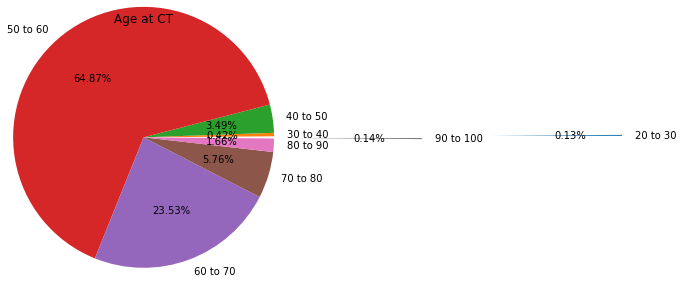

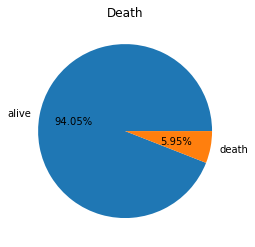

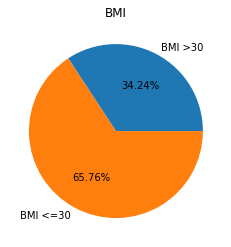

In [2]:
# Demographic plots
# sex
sex = df["Sex"].value_counts()
female_cnt = sex["Female"]
male_cnt = sex["Male"]
sex_cnt = np.array([female_cnt,male_cnt])
sex_label = np.array(["Female","Male"])
plt.title("Sex") # 
plt.pie(sex_cnt,
        labels=sex_label, 
        autopct='%.2f%%',
       )
plt.show()

# age at CT
age = df["Age at CT"]
age_cnt = np.zeros(8)
age_label = np.array([str(10 * i) + " to "+ str(10 * (i + 1)) for i in range(2,10)])
for i in range(2,10):
    age_cnt[i - 2] = np.count_nonzero(np.logical_and(age >= 10 * i, age < 10 * (i + 1)))
print(np.sum(age_cnt))
print(age_label)
plt.title("Age at CT") 
plt.pie(age_cnt,
        explode = (4, 0, 0, 0, 0, 0, 0, 1.7),
        labels=age_label,
        radius = 1.5,
        autopct='%.2f%%',
       )
plt.show()

#death
death = df["DEATH [d from CT]"]
alive_cnt = np.count_nonzero(np.isnan(death))
death_cnt = np.count_nonzero(np.logical_not(np.isnan(death)))
death_aggre = np.array([alive_cnt,death_cnt])
death_label = np.array(["alive","death"])
plt.pie(death_aggre,
        labels=death_label, 
        autopct='%.2f%%',
       )
plt.title("Death") # 
plt.show()

#BMI
bmi = df["BMI >30"]
y_cnt = np.count_nonzero(bmi == 'Y')
n_cnt = np.count_nonzero(bmi == 'N')
bmi_aggre = np.array([y_cnt,n_cnt])
bmi_label = np.array(["BMI >30","BMI <=30"])
plt.pie(bmi_aggre,
        labels=bmi_label, 
        autopct='%.2f%%',
       )
plt.title("BMI") # 
plt.show()

C:\Users\mkxz1320\AppData\Local\Temp/ipykernel_11092/3666354691.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=10, w_pad=10, h_pad=10)


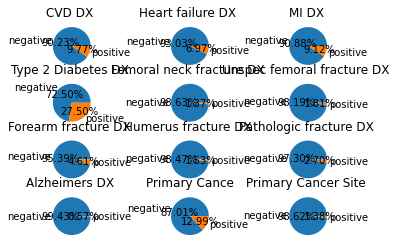

In [25]:
count = 0
for i in range(17,41,2):
    count += 1
    cur = df.iloc[:,i]
    negative_cnt = np.count_nonzero(np.isnan(cur))
    positive_cnt = np.count_nonzero(np.logical_not(np.isnan(cur)))
    cur_aggre = np.array([negative_cnt,positive_cnt])
    cur_label = np.array(["negative","positive"])
    plt.subplot(4,3,count)
    plt.tight_layout(pad=2, w_pad=10, h_pad=10)
    plt.pie(cur_aggre,
            labels=cur_label, 
            autopct='%.2f%%',
           )
    title = df.columns[i]
    title = title[:-16]
    plt.title(title) # 
plt.show()
    